1. Choose any 3 real world datasets of your choice and provide the corresponding hyperlinks in the
report but the selection should be done in such a manner that:

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

! cp drive/MyDrive/DMG/Assignment3/Mall_Customers.csv .
! cp drive/MyDrive/DMG/Assignment3/wine.data .
! cp drive/MyDrive/DMG/Assignment3/Iris.csv .

Mounted at /content/drive


(a) (5 points) Density based clustering is most suitable for the 1st dataset.

In [ ]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(["CustomerID"], axis = 1)
data = data.drop(["Gender"], axis = 1)

In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


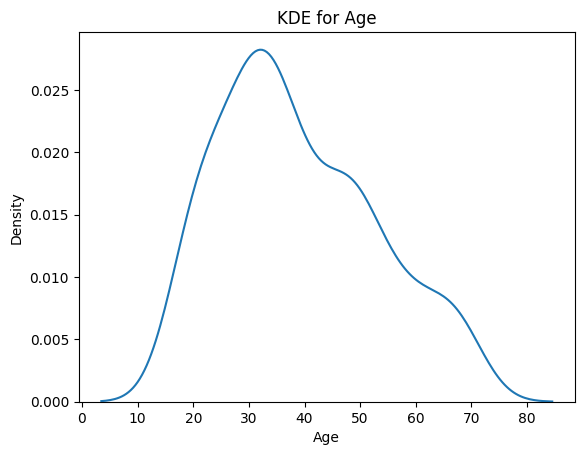

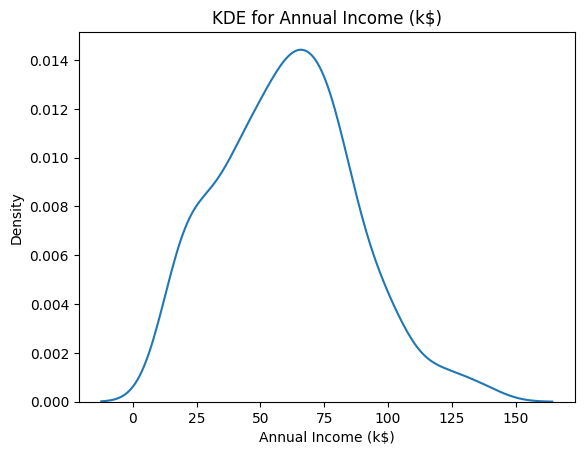

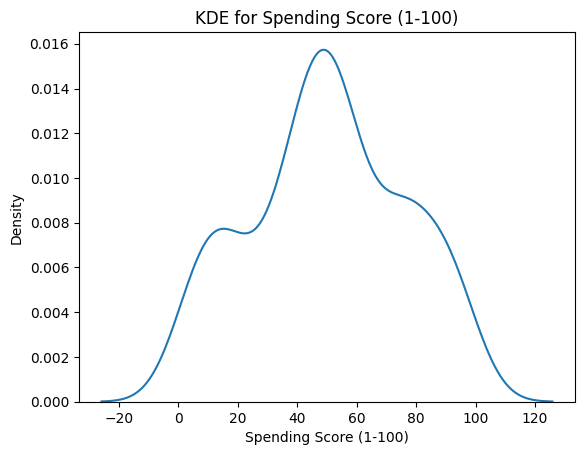

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_cols = data.columns
for i in range(len(feature_cols)):

    sns.kdeplot(data[feature_cols[i]])
    plt.title("KDE for {}".format(feature_cols[i]))
    plt.show()

In [ ]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
data_array = data[["Annual Income (k$)","Spending Score (1-100)"]]
normalizer = StandardScaler()
normalizer.fit(data_array)
data_normalized = data_array

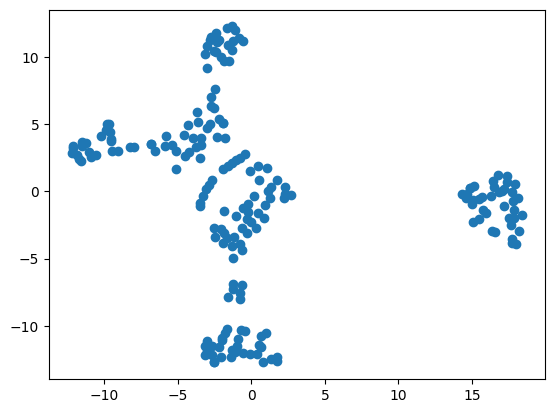

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
tsne_ouput = TSNE(n_components=2, learning_rate='auto').fit_transform(data_normalized)
plt.scatter(x=tsne_ouput[:,0], y=tsne_ouput[:,1],)

(b) (5 points) Hierarchical based clustering is most suitable for the 2nd dataset.

In [ ]:
import pandas as pd
data = pd.read_csv("wine.data")

In [ ]:
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "1"])
data_y = np.array(data.loc[:,data.columns == "1"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

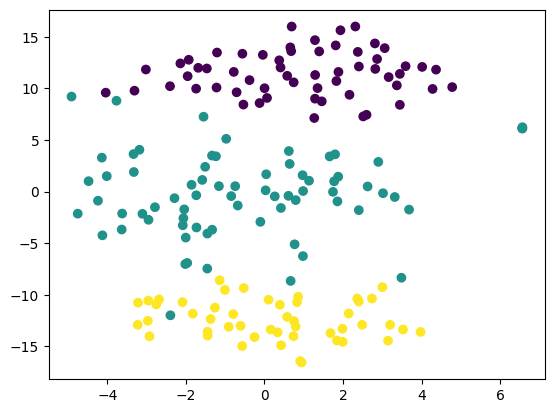

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
tsne_ouput = TSNE(n_components=2).fit_transform(data_normalized)
plt.scatter(x=tsne_ouput[:,0], y=tsne_ouput[:,1],c= data_y)

(c) (5 points) Prototype based clustering is most suitable for the 3rd dataset.

In [ ]:
import pandas as pd
data = pd.read_csv("Iris.csv")
data["Species"] = data["Species"].apply(lambda x: 0 if x=='Iris-setosa'else
                                           2 if x == "Iris-virginica" else 1 )

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "Species"])
data_y = np.array(data.loc[:,data.columns == "Species"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

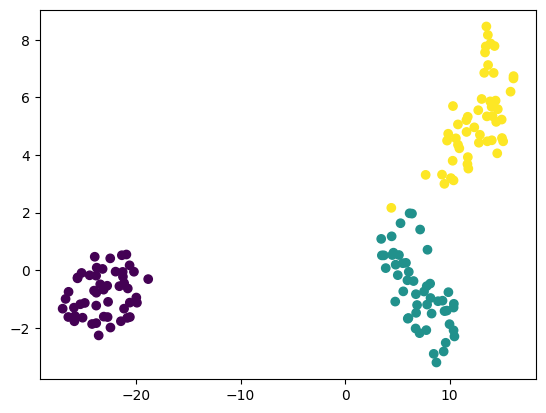

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
tsne_ouput = TSNE(n_components=2).fit_transform(data_normalized)
plt.scatter(x=tsne_ouput[:,0], y=tsne_ouput[:,1],c = data_y)